In [1]:
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os,sys
import pandas as pd
import geocat.datafiles as gdf
from geocat.viz import cmaps as gvcmaps
from geocat.viz import util as gvutil
import regionmask


In [2]:
t = xr.open_dataset('CMEMS_SST_2DSUMMER_SEASON.nc')

In [3]:
t

<xarray.Dataset>
Dimensions:  (lat: 146, lon: 188, year: 33)
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
Data variables:
    thetao   (year, lat, lon) float32 ...

In [4]:
#file_csv_area_1= pd.read_csv('area111.csv')
#file_csv_area_1= pd.read_csv('area222.csv')
#file_csv_area_1= pd.read_csv('area333.csv')
#file_csv_area_1= pd.read_csv('area444.csv')
file_csv_area_1= pd.read_csv('areaAdriatic.csv')


In [5]:
temp = t['thetao'][:,:,:]

In [6]:
temp

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 1.018
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

In [7]:
temp_av= np.mean(temp[:],axis = 0)


In [8]:
temp_av

<xarray.DataArray 'thetao' (lat: 146, lon: 188)>
array([[25.062706, 25.06075 , 25.059948, ...,       nan,       nan,
              nan],
       [25.05024 , 25.049204, 25.049229, ...,       nan,       nan,
              nan],
       [25.035873, 25.035595, 25.03623 , ..., 23.747353, 23.820696,
        23.96131 ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
    depth    float32 1.018
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96

In [9]:
lon_name   = temp.lon[:]
lat_name   = temp.lat[:]

In [10]:
outline_1 = np.array(file_csv_area_1)

region_area_1 = regionmask.Regions([outline_1])



In [11]:
mask_pygeos_area_1 = region_area_1.mask(t.thetao, method="pygeos")
LON, LAT = np.meshgrid(lon_name, lat_name)



In [12]:
thetao_area_1 = temp_av.values
thetao_area_1[np.isnan(mask_pygeos_area_1)] = np.nan



In [13]:
thetao_area_1


array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 23.820696,
        23.96131 ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

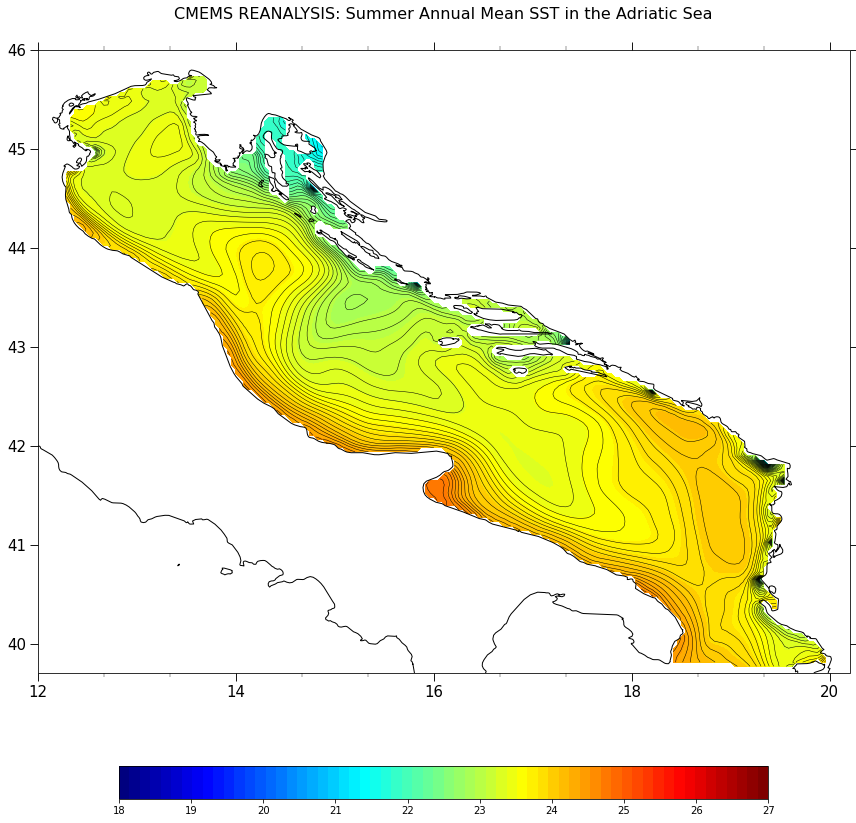

In [14]:
fig = plt.figure(figsize=(12, 18))

#  coastlines, and adding features
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.coastlines(linewidths=1,alpha=0.9999)




# Import an NCL colormap
newcmp = gvcmaps.NCV_jet

# Contourf-plot data: external contour
heatmap = temp_av.plot.contourf(ax=ax,
                          transform=projection,
                          levels=63,
                          vmin=18,
                          vmax=27,
                          cmap=newcmp,
                          add_colorbar=False)



lines=temp_av.plot.contour(ax=ax,alpha=1,linewidths=0.5,colors = 'k',linestyles='None',levels=63)

gvutil.add_major_minor_ticks(ax, y_minor_per_major=1, labelsize=15)

gvutil.set_axes_limits_and_ticks(ax,
                                 xlim=(12, 22),
                                 ylim=(37, 46),
                                 xticks=np.linspace(12, 22, 6),
                                 yticks=np.linspace(37, 46, 10))


cbar_ticks=np.arange(17, 28, 1)
cbar = plt.colorbar(heatmap,
                    orientation='horizontal',
                    shrink=0.8,
                    pad=0.073,
                    extendrect=True,
                    ticks=cbar_ticks)



ax.set_extent([12, 20.2, 39.7, 46])
#ax.set_extent([12.1458333333333321, 14.8124999999999982, 43.9583340312159336, 45.7916678850040881])
#ax.set_extent([12.9030545454545, 15.5260363636364, 42.67, 45.1154181818182])
#ax.set_extent([14.0166636363636, 17.1778454545455, 41.9038828181818, 43.8950363636364])
#ax.set_extent([15.8904181818182, 19.9877818181818, 39.6991617292197, 43.1738818181818])
gvutil.set_titles_and_labels(
    ax,
    maintitle="CMEMS REANALYSIS: Summer Annual Mean SST in the Adriatic Sea",
    maintitlefontsize=16,
    xlabel="",
    ylabel="")
plt.tight_layout()
ax.xlabel_style = {'size': 20, 'color': 'k'}
ax.ylabel_style = {'size': 20, 'color': 'k'}
plt.savefig('summer_in_the AdriaticSea.png')
